In [2]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from os.path import isfile , join
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pylab

In [3]:
temp_data = pd.read_csv("../Temperature/cleanglobaltemp.csv")
temp_data.head()

,Unnamed: 0,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,0,1743,4.384,2.294,Åland
1,5,1744,1.530,4.680,Åland
2,6,1744,6.702,1.789,Åland
3,7,1744,11.609,1.577,Åland
4,8,1744,15.342,1.410,Åland


In [4]:
#Selected US data
is_usa = temp_data["Country"] == "United States"
usa_data = temp_data[is_usa]

In [5]:
usa_data.head()

,Unnamed: 0,dt,AverageTemperature,AverageTemperatureUncertainty,Country
524171,554880,1768,15.420,2.880,United States
524172,554881,1768,8.162,3.386,United States
524173,554882,1768,1.591,3.783,United States
524174,554883,1768,-2.882,4.979,United States
524175,554884,1769,-3.952,4.856,United States


In [6]:
#Selected records between 1924 and 2018
is_gt_1924 = usa_data["dt"] >= 1924
usa_data = usa_data[is_gt_1924]
is_le_2018 = usa_data["dt"] <= 2018
usa_data = usa_data[is_le_2018]

In [7]:
#Group by date and found mean
groupby_dt = usa_data.groupby("dt")
mean_agg = groupby_dt["AverageTemperature"].mean()
temperature_df = mean_agg.to_frame()
temperature_df = temperature_df.reset_index()
temperature_df.head()

,dt,AverageTemperature
0,1924,8.052333
1,1925,9.016417
2,1926,9.140250
3,1927,8.719333
4,1928,8.876000


In [8]:
#Combined hurricane with temperature data
hurricane = pd.read_csv("hurricane_cleaned.csv")
hurricane_with_avg_temp = hurricane.set_index("Year").join(temperature_df.set_index("dt"))
hurricane_with_avg_temp.head()

,Name,Category 5,Category 4,Category 3,Category 2,Category 1,Tropical storm,Tropical depression,Unnamed: 9,AverageTemperature
1924,Cuba,Cuba,NaN,NaN,NaN,Florida,The Bahamas,NaN,NaN,8.052333
1928,Okeechobee,Puerto Rico,"Guadeloupe, Turks and Caicos Islands, The Baha...",NaN,NaN,South Carolina,NaN,NaN,NaN,8.876000
1932,Bahamas,The Bahamas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.539500
1932,Cuba,NaN,Little Cayman & Cuba,The Bahamas,NaN,NaN,Martinique,NaN,NaN,8.539500
1933,Cuba–Brownsville,The Bahamas,NaN,Cuba & Texas,NaN,NaN,NaN,NaN,NaN,9.030583


In [9]:
# Created hurricane count dataframe
count_series = hurricane.groupby("Year")["Name"].count()
count_df = count_series.to_frame()
count_df = count_df.reset_index()
count_df.head()

,Year,Name
0,1924,1
1,1928,1
2,1932,2
3,1933,2
4,1935,1


In [10]:
#Combined hurricane count with avg_temperature
combined = count_df.set_index("Year").join(temperature_df.set_index("dt"))
combined.head()

,Name,AverageTemperature
Year,,
1924,1,8.052333
1928,1,8.876000
1932,2,8.539500
1933,2,9.030583
1935,1,8.742500


In [11]:
# Reset index and rename column and cleanup
combined = combined.reset_index()
combined = combined.rename(columns={"Name":"Hurricane Count"})
combined = combined[["Year", "Hurricane Count", "AverageTemperature"]]
combined.head()

,Year,Hurricane Count,AverageTemperature
0,1924,1,8.052333
1,1928,1,8.876000
2,1932,2,8.539500
3,1933,2,9.030583
4,1935,1,8.742500


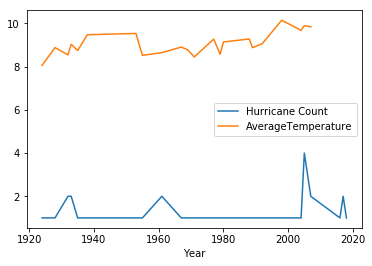

In [12]:

combined = combined.set_index(["Year"])
plt1 = combined.plot()

In [13]:
# Removed nan
combined = combined.dropna()

In [14]:
# Model Using LinearRegression 
model = LinearRegression()
# Created dependent and independent variables
y = combined["Hurricane Count"].values.reshape(-1, 1)
X = combined["AverageTemperature"].values.reshape(-1, 1)


# Split sample into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)
# Fit the model
model.fit(X_train, y_train)

predicted = model.predict(X_test)

# Scored the predictions with MSE and R2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.36451095279272955
R-squared (R2 ): 0.0


In [15]:
model.score(X_test, y_test)

0.0

Text(0.5,1,'Training Data')

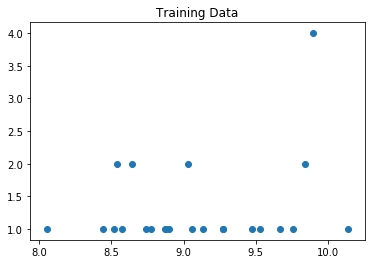

In [16]:
#Created Scatter plot
x_axis = combined["AverageTemperature"].values.reshape(-1, 1)
y_axis = combined["Hurricane Count"].values.reshape(-1, 1)

plt.scatter(x_axis, y_axis)
plt.title("Training Data") 

/Users/raghi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """


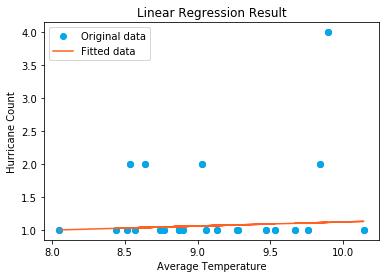

In [49]:
#Added Trend line
# fig, ax = plt.subplots(facecolor='#D7BCC8')
pylab.plot(x_axis,y_axis,'o')
x_axis[0]
z = np.polyfit(x_axis[0], y_axis[0], 1)
p = np.poly1d(z)
plt.plot(x_axis,y_axis, 'ro', label ='Original data',color='#02A9EA') 
pylab.plot(x_axis, p(x_axis), "#FF6123",label ='Fitted data')
plt.xlabel("Average Temperature")
plt.ylabel("Hurricane Count")
plt.title('Linear Regression Result') 
pylab.legend(loc='upper left')